### Essential Imports

In [1]:
# for opening file paths 
import os

# for creating matrices
import numpy as np

# for plotting and visualization
import matplotlib.pyplot as plt

# for image manipulation
import cv2

# for shuffling the training data
import random

# for saving the dataset created from images
import pickle

### Essential Constants

In [2]:
# The full path of the folder where the dataset is downloaded
DATADIR = './Datasets'

# The categories to which the data is divided in
# Here the folder name is the category
CATEGORIES = ['Dog', 'Cat']

# The final square size of the manipulated image
# which we will work on
IMG_SIZE = 50

### Visualising the dataset

#### Making list of images' paths (8 dogs and 8 cats)

In [3]:
# an array to store image paths
images = []

# iterating through categories
for category in CATEGORIES:
    
    # current path of the particular category
    # ./Dataset/Dog or ./Dataset/Cat
    path = os.path.join(DATADIR, category)
    
    # Iterating over first 8 images of that directory
    for img in os.listdir(path)[:8]:
        
        # storing the path of those images in the image array
        images.append(os.path.join(path, img))

#### Plotting the images

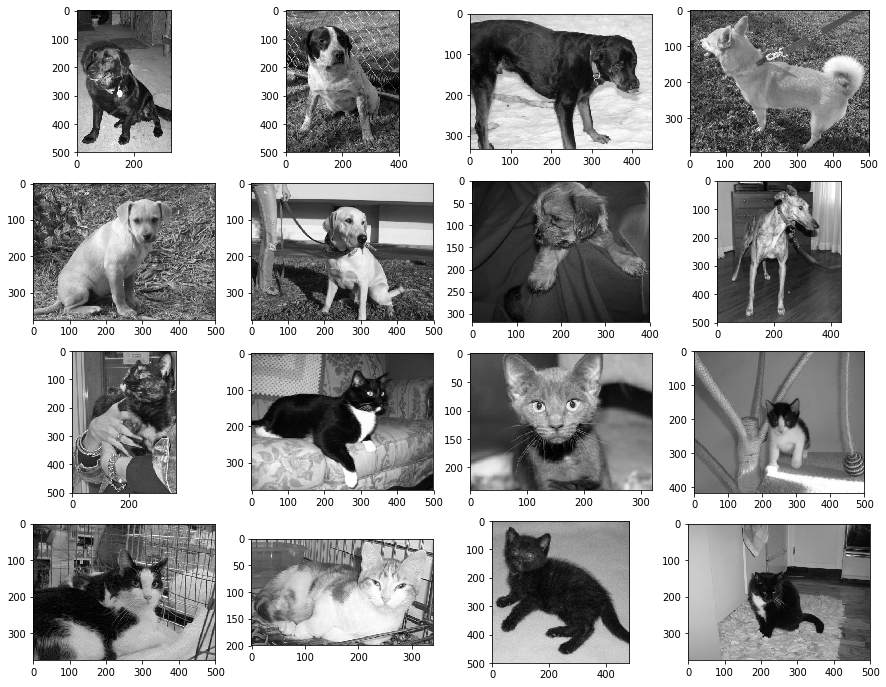

In [4]:
# defining a new figure where the images will be plotted
plt.figure(figsize=(15,12))

# iterating through the images array
# where the paths are stored
for i in range(len(images)):
    
    # Adding a subplot for each image
    plt.subplot(4,4,i+1)
    
    # Since pixels cannot be directly used 
    # Converting the image into array format using "cv2.imread()"
    # Converting it into grayscale to reduce computation
    img_array = cv2.imread(images[i], cv2.IMREAD_GRAYSCALE)
    
    #plotting the image
    plt.imshow(img_array, cmap='gray')

### Resizing each image

Since all images are of different dimensions, it is recommended to bring these images to a same size.
Also using less pixels per image will reduce computation without losing much of the essential details

Here we scale all images to 50x50 pixel

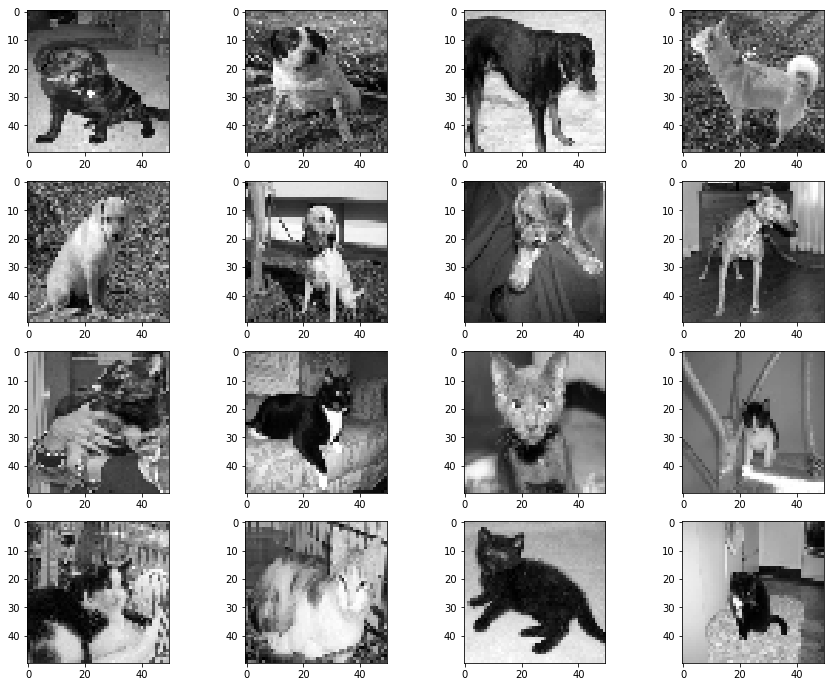

In [5]:
plt.figure(figsize=(15,12))

for i in range(len(images)):
    plt.subplot(4,4,i+1)
    img_array = cv2.imread(images[i], cv2.IMREAD_GRAYSCALE)
    
    # Same code as before 
    # except we are resizing the image before plotting
    # using "cv2.resize()"
    resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    
    plt.imshow(resized, cmap='gray')

# We can see that quality did reduce but the images are still distinguishable

.

.

## Creating Final Training Data 

In [6]:
# The array of final training data
training_data = []

In [7]:
# function for creating the training data
def create_training_data():
    
    ############ CONVERSION OF IMAGES TO ARRAY #################
    
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        
        # we will use the label 0 and 1 instead of cat and dog
        # hence the index of the category will be the label
        label = CATEGORIES.index(category)
        print('generating dataset for category: {}'.format(category))
        
        # for counting how many images have been processed
        counter = 0
        
        # iterating over each image
        for img in os.listdir(path):
            
            # using try-except block because some images might be broken
            try:
                counter+=1
                print('{} images processed and added'.format(counter), end='\r')
                
                # reading the image and converting to array
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                
                # resizing the image to 50x50
                resized_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                
                # adding the resized image and label into training data array
                training_data.append([resized_img, label])
                
            except Exception as e:
                # if exception was found it will skip that image
                pass
        
        # process confirmation for that category
        print('Total images in data for the category {} : {}\n'.format(category, counter))
    
    ############ SHUFFLING OF DATA TO REMOVE CONTINUITY #################
    
    # data is shuffled to remove any continuity
    # in this example first 12k images are of dog and next 12k are cat
    # the model might overfit on dog
    
    print('Shuffling data...\n')
    random.shuffle(training_data)
    
    
    ############ SEPARATING FEATURES FROM LABELS #################
    
    print('Separating labels and features...\n')
    
    # X is the list of features for all images
    X = []
    
    # y is the labels for the images
    y = []

    for features, label in training_data:
        X.append(features)
        y.append(label)
    
    # the image data must be stored in the format that is accepted by keras
    
    # 1st argument = number of data points (-1 for any number of data points)
    # 2nd argument = width of each image here 50px
    # 3rd argument = height of each image here 50px
    # 4th argument = number of channels (1 for grayscale, 3 for RGB/BGR)
    
    X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    y = np.array(y)
    
    
    ############ SAVING THE EXTRACTED DATA IN REUSABLE FORMAT #################
    
    # it is computationally expensive to create the data from beginning
    # everytime we want to use the data
    # So we save the converted images into array format
    # into a pickle file, which can directly be used later
    
    print('Saving features pickle..')
    
    pickle_out = open('X.pickle', 'wb')
    pickle.dump(X, pickle_out)
    pickle_out.close()
    
    print('Saving labels pickle..\n')
    
    pickle_out = open('y.pickle', 'wb')
    pickle.dump(y, pickle_out)
    pickle_out.close()
    
    print('Data Saving complete. Find the data in the same folder as X.pickle and y.pickle\n')
    print('Data Conversion done...!')

# RUNNING THE FUNCTION AND CREATING DATASET

In [8]:
create_training_data()

generating dataset for category: Dog
Total images in data for the category Dog : 12501

generating dataset for category: Cat
Total images in data for the category Cat : 12501

Shuffling data...

Separating labels and features...

Saving features pickle..
Saving labels pickle..

Data Saving complete. Find the data in the same folder as X.pickle and y.pickle

Data Conversion done...!
